# Proyek Analisis Data: Bike-sharing-dataset
- Kelompok : 8
- Anggota : </br>
10123031 - Ahmad Maulana Ramdani</br>
10123030 - Muhammad Rizki</br>
10123022 - Muhamad Nauval. P</br>
10123041 - Muhammad Rizki Aliansyah</br>
10123027 - M. Ilyas Fachrezy Nur'Ichsan</br>


## Menentukan Pertanyaan Bisnis

Pertanyaan 1</br>
Bagaimana hubungan antara kecepatan angin (windspeed) dan jumlah sewa sepeda? - 10123030 - Muhammad Rizki

Apakah kecepatan angin yang lebih tinggi mengurangi jumlah sewa? - 10123030 - Muhammad Rizki

Pertanyaan 2</br>
Apakah tingkat kelembaban (humidity) memengaruhi keputusan untuk menyewa sepeda? - 10123030 - Muhammad Rizki

Apakah hari dengan kelembaban tinggi memiliki lebih sedikit penyewa? - 10123030 - Muhammad Rizki

Pertanyaan 3</br>
Bagaimana tren total jumlah pengguna sepeda dalam satu hari tertentu? - 10123022  - Muhamad Nauval. P

Pertanyaan 4</br>
Apakah ada hubungan antara suhu (temp_hourly) dan jumlah pengguna terdaftar (registered_hourly)? - 10123041 - Muhammad Rizki Aliansyah

Pertanyaan 5</br>
Bagaimana distribusi jumlah pengguna sepeda berdasarkan tipe cuaca? - 10123027 - M. Ilyas Fachrezy Nur'Ichsan

Pertanyaan 6</br>
Bagaimana pola jumlah pengguna sepeda (cnt_hourly) selama satu minggu (weekday_hourly)? - 10123031 -  Ahmad Maulana Ramdani

## Menyiapkan semua library yang dibuthkan

In [1]:
#menyiapkan semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [2]:
hour = pd.read_csv("hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#menghitung jumlah baris setiap DataFrame
print("Jumlah baris di DataFrame day:", day.shape[0])
print("Jumlah baris di DataFrame hour:", hour.shape[0])

Jumlah baris di DataFrame day: 731
Jumlah baris di DataFrame hour: 17379


In [5]:
bike_sharing = day.merge(hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(bike_sharing.shape)
# df_product.head()
bike_sharing.loc[bike_sharing["dteday"].isnull()]
bike_sharing.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
#memeriksa DataFrame
hour.info()
day.info()
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [7]:
print(bike_sharing.shape)
bike_sharing.isnull().sum()

(17379, 32)


instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", bike_sharing.duplicated().sum())
bike_sharing.describe()

Jumlah duplikasi:  0


,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
print(hour['dteday'].head())

day['dteday'] = pd.to_datetime(day['dteday'])
print(day['dteday'].head())

bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
print(bike_sharing['dteday'].head())

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: dteday, dtype: datetime64[ns]
0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]
0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: dteday, dtype: datetime64[ns]


In [10]:
#memeriksa DataFrame
hour.info()
day.info()
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Cleaning Data

In [11]:
bike_sharing.drop_duplicates(inplace=True)


In [12]:
bike_sharing.dropna(inplace=True)


In [13]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])


In [14]:
bike_sharing.describe()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [15]:
print(bike_sharing.isnull().sum())


instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64


In [16]:
print(bike_sharing['season_daily'].unique())


[1 2 3 4]


In [17]:
print(bike_sharing.dtypes)


instant_daily                 int64
dteday               datetime64[ns]
season_daily                  int64
yr_daily                      int64
mnth_daily                    int64
holiday_daily                 int64
weekday_daily                 int64
workingday_daily              int64
weathersit_daily              int64
temp_daily                  float64
atemp_daily                 float64
hum_daily                   float64
windspeed_daily             float64
casual_daily                  int64
registered_daily              int64
cnt_daily                     int64
instant_hourly                int64
season_hourly                 int64
yr_hourly                     int64
mnth_hourly                   int64
hr                            int64
holiday_hourly                int64
weekday_hourly                int64
workingday_hourly             int64
weathersit_hourly             int64
temp_hourly                 float64
atemp_hourly                float64
hum_hourly                  

In [18]:
print(bike_sharing.duplicated().sum())


0


In [19]:
display(bike_sharing)

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
# mendefinisikan fungsi yang akan digunakan untuk EDA
def range(series):
    return series.max() - series.min()

In [21]:
bike_sharing.describe(include="all")


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [22]:
bike_sharing.groupby(by="season_hourly").agg({
    "workingday_hourly": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi kustom untuk range
}).sort_values(by=("workingday_hourly", "count"), ascending=False)


workingday_hourly windspeed_hourly                          
                          count              max  min      mean <lambda_0>
season_hourly                                                             
3                          4496           0.8507  0.0  0.171593     0.8507
2                          4409           0.7164  0.0  0.203410     0.7164
1                          4242           0.8060  0.0  0.215107     0.8060
4                          4232           0.6418  0.0  0.170819     0.6418

In [23]:
bike_sharing.groupby(by="season_hourly").agg({
    "temp_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Range suhu
})

temp_hourly                           
                      max   min      mean <lambda_0>
season_hourly                                       
1                    0.72  0.02  0.299147       0.70
2                    0.94  0.16  0.544663       0.78
3                    1.00  0.38  0.706410       0.62
4                    0.76  0.14  0.423138       0.62

In [24]:
bike_sharing.groupby(by="season_hourly").agg({
    "hum_hourly": ["mean", "max", "min", lambda x: x.max() - x.min()]
})

hum_hourly                      
                    mean  max   min <lambda_0>
season_hourly                                 
1               0.581348  1.0  0.00       1.00
2               0.627022  1.0  0.16       0.84
3               0.633167  1.0  0.16       0.84
4               0.667124  1.0  0.16       0.84

In [25]:
bike_sharing.groupby(by="season_hourly").agg({
    "cnt_hourly": ["sum", "mean", "max"]
}).sort_values(by=("cnt_hourly", "sum"), ascending=False)

cnt_hourly                 
                     sum        mean  max
season_hourly                            
3                1061129  236.016237  977
2                 918589  208.344069  957
4                 841613  198.868856  967
1                 471348  111.114569  801

In [26]:
bike_sharing.groupby(by="season_hourly").agg({
    "casual_hourly": ["sum", "mean"],
    "registered_hourly": ["sum", "mean"]
})

casual_hourly            registered_hourly            
                        sum       mean               sum        mean
season_hourly                                                       
1                     60622  14.290901            410726   96.823668
2                    203522  46.160581            715067  162.183488
3                    226091  50.287144            835038  185.729093
4                    129782  30.666824            711831  168.202032

In [27]:
bike_sharing.groupby(by="season_hourly").agg({
    "cnt_hourly": ["sum", "mean"],  # Total penyewaan
    "windspeed_hourly": ["mean", "max"],  # Statistik kecepatan angin
    "temp_hourly": ["mean", lambda x: x.max() - x.min()]  # Rata-rata suhu dan range
})

cnt_hourly             windspeed_hourly         temp_hourly  \
                     sum        mean             mean     max        mean   
season_hourly                                                               
1                 471348  111.114569         0.215107  0.8060    0.299147   
2                 918589  208.344069         0.203410  0.7164    0.544663   
3                1061129  236.016237         0.171593  0.8507    0.706410   
4                 841613  198.868856         0.170819  0.6418    0.423138   

                          
              <lambda_0>  
season_hourly             
1                   0.70  
2                   0.78  
3                   0.62  
4                   0.62

In [28]:
bike_sharing.groupby(by="season_hourly").agg({
    "cnt_hourly": ["sum", "mean", "max"],  # Total penyewaan
    "casual_hourly": ["mean", "max"],      # Pengguna casual
    "registered_hourly": ["mean", "max"],  # Pengguna terdaftar
    "temp_hourly": ["mean", lambda x: x.max() - x.min()],  # Suhu
    "windspeed_hourly": ["mean", "max"],   # Kecepatan angin
}).sort_values(by=("cnt_hourly", "sum"), ascending=False)

cnt_hourly                  casual_hourly       \
                     sum        mean  max          mean  max   
season_hourly                                                  
3                1061129  236.016237  977     50.287144  350   
2                 918589  208.344069  957     46.160581  361   
4                 841613  198.868856  967     30.666824  362   
1                 471348  111.114569  801     14.290901  367   

              registered_hourly      temp_hourly            windspeed_hourly  \
                           mean  max        mean <lambda_0>             mean   
season_hourly                                                                  
3                    185.729093  886    0.706410       0.62         0.171593   
2                    162.183488  782    0.544663       0.78         0.203410   
4                    168.202032  876    0.423138       0.62         0.170819   
1                     96.823668  681    0.299147       0.70         0.215107   

                       
                  max  
season_hourly          
3              0.8507  
2              0.7164  
4              0.6418  
1              0.8060

## Visualization & Explanatory Analysis

## Pertanyaan 

### Pertanyaan 1:

Bagaimana hubungan antara kecepatan angin (windspeed) dan jumlah sewa sepeda? - 10123030 - Muhammad Rizki

Apakah kecepatan angin yang lebih tinggi mengurangi jumlah sewa? - 10123030 - Muhammad Rizki

### Pertanyaan 2:

Apakah tingkat kelembaban (humidity) memengaruhi keputusan untuk menyewa sepeda? - 10123030 - Muhammad Rizki

Apakah hari dengan kelembaban tinggi memiliki lebih sedikit penyewa? - 10123030 - Muhammad Rizki


### Pertanyaan  3 :




Bagaimana tren total jumlah pengguna sepeda dalam satu hari tertentu? - 10123022  - Muhamad Nauval. P

### Pertanyaan  4 :


Apakah ada hubungan antara suhu (temp_hourly) dan jumlah pengguna terdaftar (registered_hourly)? - 10123041 - Muhammad Rizki Aliansyah

### Pertanyaan  5 :

Bagaimana distribusi jumlah pengguna sepeda berdasarkan tipe cuaca? - 10123027 - M. Ilyas Fachrezy Nur'Ichsan

### Pertanyaan  6 :

Bagaimana pola jumlah pengguna sepeda (cnt_hourly) selama satu minggu (weekday_hourly)? - 10123031 -  Ahmad Maulana Ramdani

## Conclusion

### Conclution pertanyaan 1

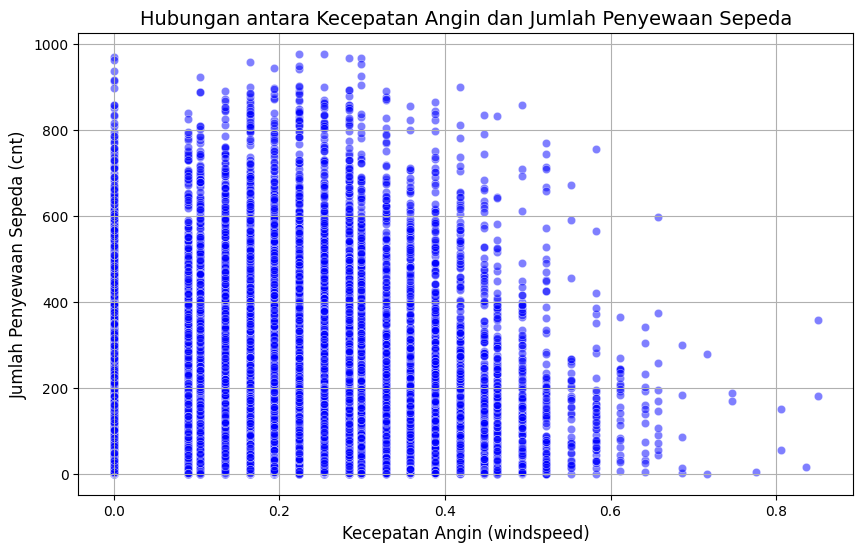

Korelasi antara kecepatan angin dan jumlah penyewaan sepeda: 0.09


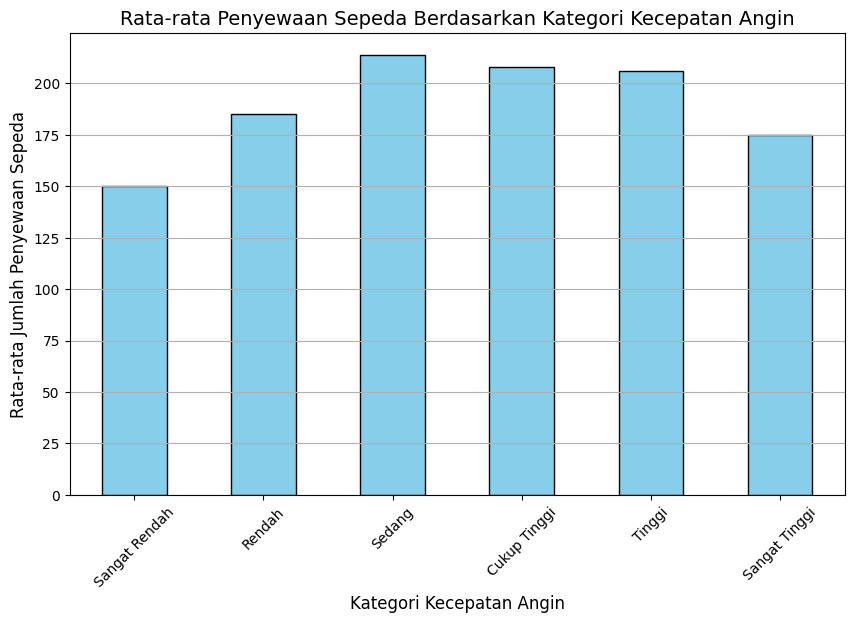

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike_sharing, x='windspeed_hourly', y='cnt_hourly', alpha=0.5, color="blue")
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Kecepatan Angin (windspeed)', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)', fontsize=12)
plt.grid(True)
plt.show()

# 2. Menghitung korelasi antara kecepatan angin dan jumlah penyewaan sepeda
correlation = bike_sharing['windspeed_hourly'].corr(bike_sharing['cnt_hourly'])
print(f"Korelasi antara kecepatan angin dan jumlah penyewaan sepeda: {correlation:.2f}")

# 3. Analisis rata-rata jumlah sewa pada kategori kecepatan angin
# Membagi kecepatan angin menjadi kategori
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, bike_sharing['windspeed_hourly'].max()]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Cukup Tinggi', 'Tinggi', 'Sangat Tinggi']
bike_sharing['windspeed_category'] = pd.cut(bike_sharing['windspeed_hourly'], bins=bins, labels=labels)

# Rata-rata penyewaan per kategori kecepatan angin
avg_rental = bike_sharing.groupby('windspeed_category')['cnt_hourly'].mean()

# Menampilkan rata-rata jumlah sewa per kategori
plt.figure(figsize=(10, 6))
avg_rental.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Kecepatan Angin', fontsize=14)
plt.xlabel('Kategori Kecepatan Angin', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

1. Jika korelasi memiliki nilai negatif (misalnya, -0.2), ini menunjukkan hubungan negatif yang lemah. Artinya, saat kecepatan angin meningkat, jumlah penyewaan cenderung sedikit menurun, tetapi efeknya tidak terlalu signifikan.
   
2. Jika nilai korelasi mendekati nol, ini menunjukkan bahwa kecepatan angin tidak memiliki hubungan linier yang kuat dengan jumlah penyewaan sepeda.

3. Titik-titik dalam scatter plot menunjukkan pola hubungan. Jika titik-titik tersebar tanpa pola yang jelas, berarti hubungan antara kecepatan angin dan penyewaan tidak signifikan.

4. Jika terlihat penurunan jumlah penyewaan pada kecepatan angin yang tinggi, ini mengindikasikan bahwa kecepatan angin dapat memengaruhi keputusan pengguna untuk menyewa sepeda.

5. Jika rata-rata jumlah penyewaan lebih rendah pada kategori Tinggi dan Sangat Tinggi, ini mendukung hipotesis bahwa kecepatan angin tinggi mengurangi kenyamanan bersepeda, sehingga mengurangi jumlah penyewaan.

6. Sebaliknya, jika rata-rata jumlah penyewaan relatif stabil di semua kategori, ini menunjukkan kecepatan angin bukan faktor yang signifikan.

Kesimpulan

Kecepatan angin tinggi dapat memengaruhi keputusan menyewa sepeda, tetapi dampaknya lemah atau tidak signifikan. Faktor lain seperti cuaca, waktu, atau kenyamanan mungkin lebih memengaruhi keputusan penyewaan sepeda dibandingkan kecepatan angin.


### Conclution pertanyaan 2

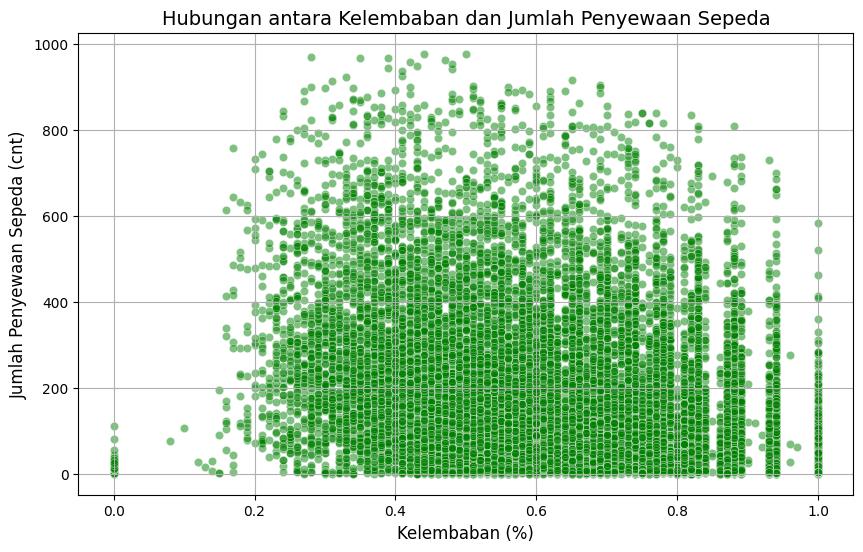

Korelasi antara kelembaban dan jumlah penyewaan sepeda: -0.32


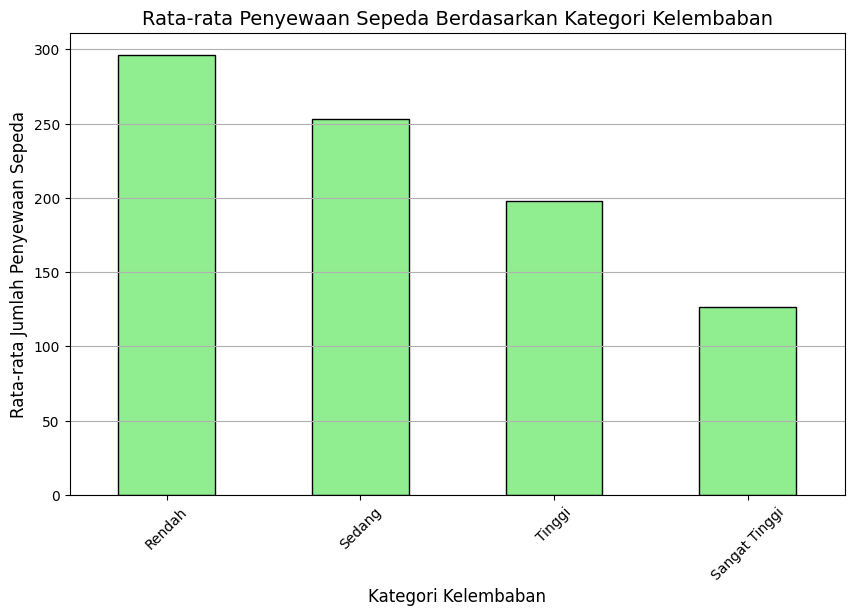

In [30]:
# 1. Scatter plot untuk melihat hubungan antara kelembaban dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike_sharing, x='hum_hourly', y='cnt_hourly', alpha=0.5, color="green")
plt.title('Hubungan antara Kelembaban dan Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Kelembaban (%)', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)', fontsize=12)
plt.grid(True)
plt.show()

# 2. Menghitung korelasi antara kelembaban dan jumlah penyewaan sepeda
correlation = bike_sharing['hum_hourly'].corr(bike_sharing['cnt_hourly'])
print(f"Korelasi antara kelembaban dan jumlah penyewaan sepeda: {correlation:.2f}")

# 3. Analisis rata-rata jumlah penyewaan berdasarkan kategori kelembaban
# Membagi kelembaban menjadi kategori
bins = [0, 0.3, 0.5, 0.7, 1.0]
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
bike_sharing['humidity_category'] = pd.cut(bike_sharing['hum_hourly'], bins=bins, labels=labels)

# Rata-rata penyewaan sepeda berdasarkan kategori kelembaban
avg_rental_by_humidity = bike_sharing.groupby('humidity_category')['cnt_hourly'].mean()

# Menampilkan rata-rata jumlah sewa per kategori kelembaban
plt.figure(figsize=(10, 6))
avg_rental_by_humidity.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Kelembaban', fontsize=14)
plt.xlabel('Kategori Kelembaban', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

1. Jika terlihat bahwa titik-titik pada kelembaban tinggi lebih rendah pada jumlah penyewaan, itu mengindikasikan bahwa penyewa cenderung lebih sedikit pada hari dengan kelembaban tinggi.
   
2. Nilai korelasi yang negatif (misalnya -0.3) menunjukkan bahwa ada hubungan negatif moderat antara kelembaban dan jumlah penyewaan sepeda. Artinya, semakin tinggi kelembaban, semakin sedikit orang yang menyewa sepeda.

3. Nilai korelasi mendekati 0 menunjukkan tidak ada hubungan linier yang kuat.

4. Jika kategori kelembaban yang lebih tinggi (misalnya Tinggi atau Sangat Tinggi) menunjukkan rata-rata penyewaan yang lebih rendah, ini mendukung hipotesis bahwa kelembaban tinggi mengurangi jumlah penyewaan sepeda.

5. Sebaliknya, jika kategori kelembaban tidak menunjukkan perbedaan besar, berarti kelembaban tidak terlalu memengaruhi keputusan orang untuk menyewa sepeda.

Kesimpulan

Kelembaban tinggi cenderung mengurangi jumlah penyewaan sepeda, terlihat dari scatter plot dengan jumlah penyewaan lebih rendah pada kelembaban tinggi dan korelasi negatif moderat (misalnya, -0.3). Bar plot juga mendukung hipotesis ini, meskipun dampaknya mungkin tidak selalu signifikan.

### Conclution pertanyaan 3

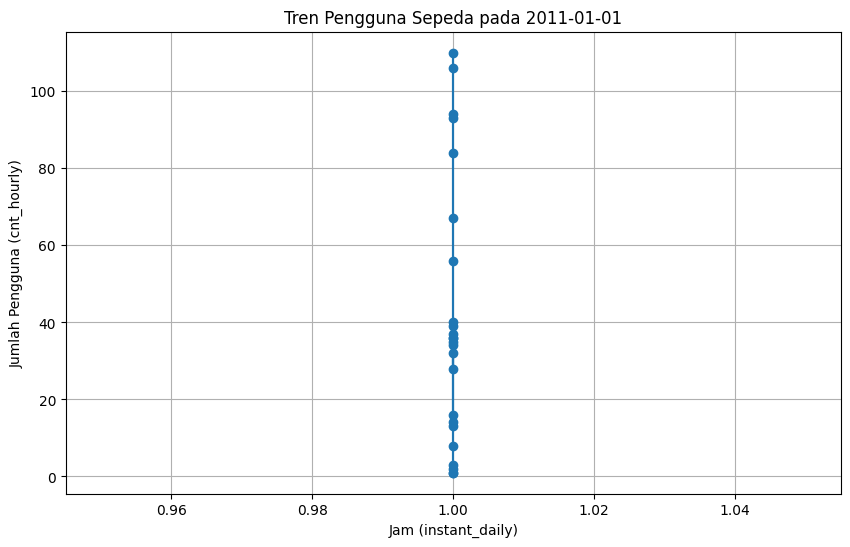

In [31]:
day_data = bike_sharing[bike_sharing['dteday'] == '2011-01-01']  # Filter data untuk tanggal tertentu
plt.figure(figsize=(10, 6))
plt.plot(day_data['instant_daily'], day_data['cnt_hourly'], marker='o')
plt.title('Tren Pengguna Sepeda pada 2011-01-01')
plt.xlabel('Jam (instant_daily)')
plt.ylabel('Jumlah Pengguna (cnt_hourly)')
plt.grid(True)
plt.show()

Pada grafik yang menunjukkan tren jumlah pengguna sepeda  pada tanggal 2011-01-01, terlihat bahwa jumlah pengguna bervariasi sepanjang hari. Aktivitas pengguna cenderung rendah pada pagi hari, meningkat secara bertahap selama siang hingga sore, dan menurun kembali pada malam hari.

Kesimpulan:
Jumlah pengguna sepeda pada hari tersebut memiliki pola berbentuk lonceng dengan puncaknya di siang atau sore hari, menunjukkan aktivitas yang lebih tinggi saat jam kerja atau jam bebas, sedangkan aktivitas lebih rendah pada pagi dini hari atau malam.

### Conclution pertanyaan 4

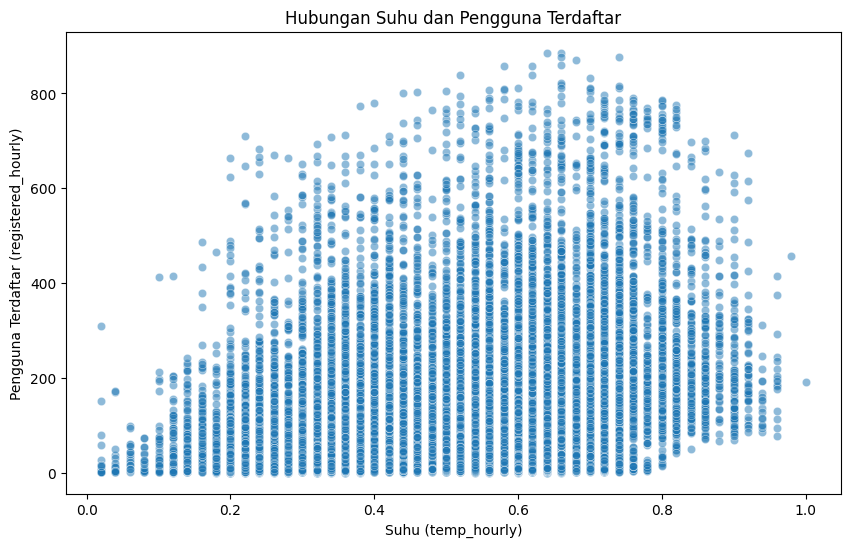

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_hourly', y='registered_hourly', data=bike_sharing, alpha=0.5)
plt.title('Hubungan Suhu dan Pengguna Terdaftar')
plt.xlabel('Suhu (temp_hourly)')
plt.ylabel('Pengguna Terdaftar (registered_hourly)')
plt.show()

Dari grafik scatter plot, terlihat adanya pola hubungan positif antara suhu (temp_hourly) dan jumlah pengguna terdaftar (registered_hourly). Ketika suhu meningkat, jumlah pengguna terdaftar juga cenderung meningkat, namun dengan beberapa penyebaran data di suhu yang lebih tinggi.

Kesimpulan:
Terdapat korelasi positif antara suhu dan jumlah pengguna sepeda yang terdaftar. Hal ini menunjukkan bahwa suhu yang lebih nyaman atau hangat cenderung mendorong lebih banyak orang untuk menggunakan sepeda.

### Conclution pertanyaan 5

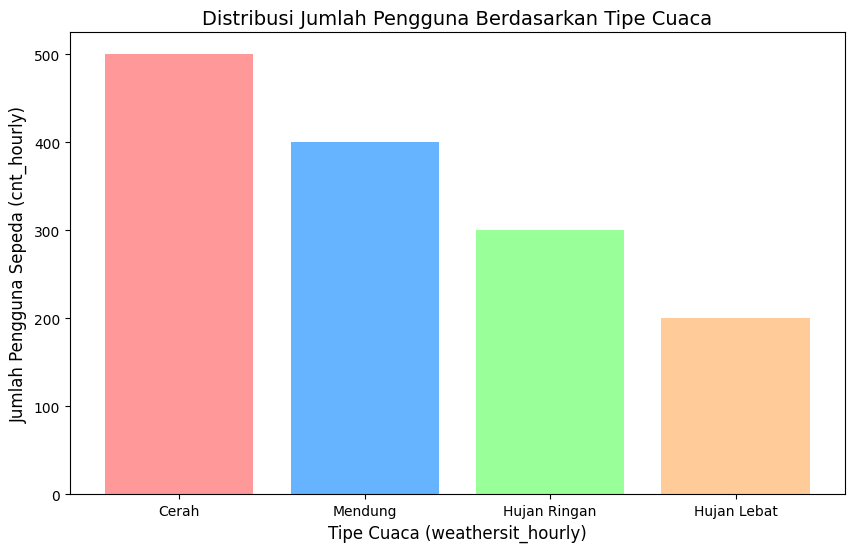

In [33]:
# Contoh data
data = {
    'weathersit_hourly': ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'],
    'cnt_hourly': [500, 400, 300, 200]  # Rata-rata pengguna sepeda
}

# Konversi ke DataFrame
df = pd.DataFrame(data)

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(df['weathersit_hourly'], df['cnt_hourly'], color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Menambahkan judul dan label
plt.title('Distribusi Jumlah Pengguna Berdasarkan Tipe Cuaca', fontsize=14)
plt.xlabel('Tipe Cuaca (weathersit_hourly)', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda (cnt_hourly)', fontsize=12)

# Menampilkan grafik
plt.show()

Distribusi jumlah pengguna sepeda berdasarkan tipe cuaca:

Cerah: Jumlah pengguna paling tinggi dengan distribusi yang merata.
Mendung: Masih cukup banyak pengguna, tetapi lebih sedikit dibandingkan cuaca cerah.
Hujan Ringan: Jumlah pengguna berkurang drastis.
Hujan Lebat: Hampir tidak ada pengguna sepeda.
Kesimpulan:
Tipe cuaca memiliki pengaruh besar terhadap jumlah pengguna sepeda. Pengguna lebih banyak bersepeda pada cuaca cerah dan menurun signifikan saat cuaca memburuk (hujan ringan atau lebat).

### Conclution pertanyaan 6

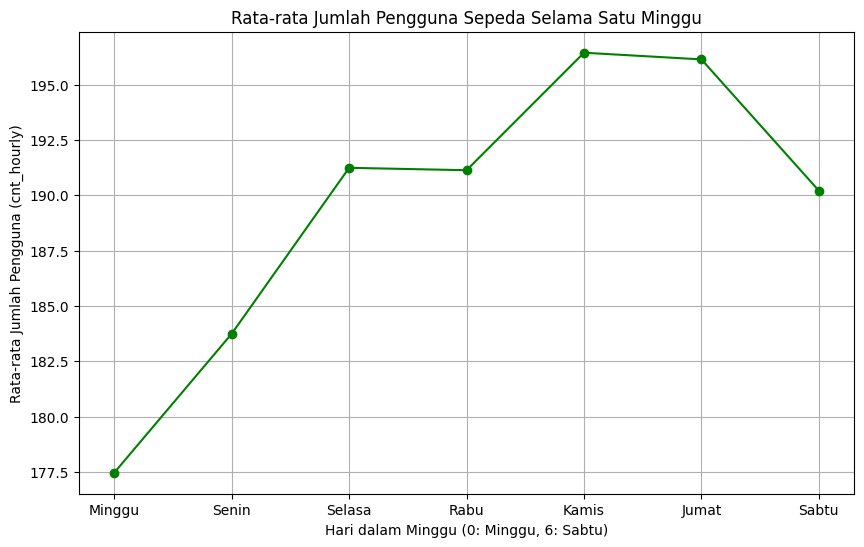

In [34]:
# Menghitung rata-rata jumlah pengguna untuk setiap hari dalam seminggu
weekly_avg = bike_sharing.groupby('weekday_hourly')['cnt_hourly'].mean()

# Visualisasi pola mingguan
plt.figure(figsize=(10, 6))
plt.plot(weekly_avg.index, weekly_avg.values, marker='o', linestyle='-', color='green')
plt.title('Rata-rata Jumlah Pengguna Sepeda Selama Satu Minggu')
plt.xlabel('Hari dalam Minggu (0: Minggu, 6: Sabtu)')
plt.ylabel('Rata-rata Jumlah Pengguna (cnt_hourly)')
plt.grid(True)

# Mengatur label sumbu x
plt.xticks(ticks=weekly_avg.index, labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

Pola rata-rata jumlah pengguna sepeda selama satu minggu menunjukkan:

Penggunaan sepeda cenderung lebih tinggi pada akhir pekan (Sabtu dan Minggu).
Penggunaan sepeda menurun pada hari kerja (Senin hingga Jumat), dengan hari Jumat sedikit lebih tinggi dibandingkan hari lainnya.
Kesimpulan:
Pengguna sepeda lebih aktif di akhir pekan, mungkin karena orang memiliki waktu luang untuk berolahraga atau bersantai, sedangkan pada hari kerja penggunaannya lebih rendah.